In [ ]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import MiniBatchKMeans

In [ ]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'intrusion_type']

In [ ]:
data = pd.read_csv('/content/kddcup.data_10_percent.gz', names=features, header=None)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
print('The no of data points are:',data.shape[0])
print('='*40)
print('The no of features are:',data.shape[1])
print('='*40)
print('Some of the features are:',features[:10])

The no of data points are: 494021
The no of features are: 42
Some of the features are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


In [ ]:
output = data['intrusion_type'].values
labels = set(output)

In [ ]:
print('The different type of output labels are:',labels)
print('='*100)
print('No. of different output labels are:', len(labels))

The different type of output labels are: {'satan.', 'perl.', 'warezmaster.', 'back.', 'pod.', 'normal.', 'ftp_write.', 'teardrop.', 'ipsweep.', 'imap.', 'buffer_overflow.', 'guess_passwd.', 'warezclient.', 'spy.', 'loadmodule.', 'smurf.', 'land.', 'multihop.', 'phf.', 'rootkit.', 'nmap.', 'neptune.', 'portsweep.'}
No. of different output labels are: 23


DATA CLEANING

In [ ]:
print('Null values in the dataset are: ',len(data[data.isnull().any(axis=1)]))

Null values in the dataset are:  0


In [ ]:
duplicateRowsDF = data[data.duplicated()]

In [ ]:
duplicateRowsDF.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
2500,0,tcp,http,SF,307,60990,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2864,0,tcp,http,SF,351,11485,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2977,0,tcp,http,SF,506,2419,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
3003,0,tcp,http,SF,319,1374,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
3130,0,tcp,http,SF,234,1212,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
data.drop_duplicates(subset=features, keep='first', inplace=True)
data.shape

(145586, 42)

In [ ]:
data.to_pickle('data.pkl')
data = pd.read_pickle('data.pkl')

Exploratory Data Analysis

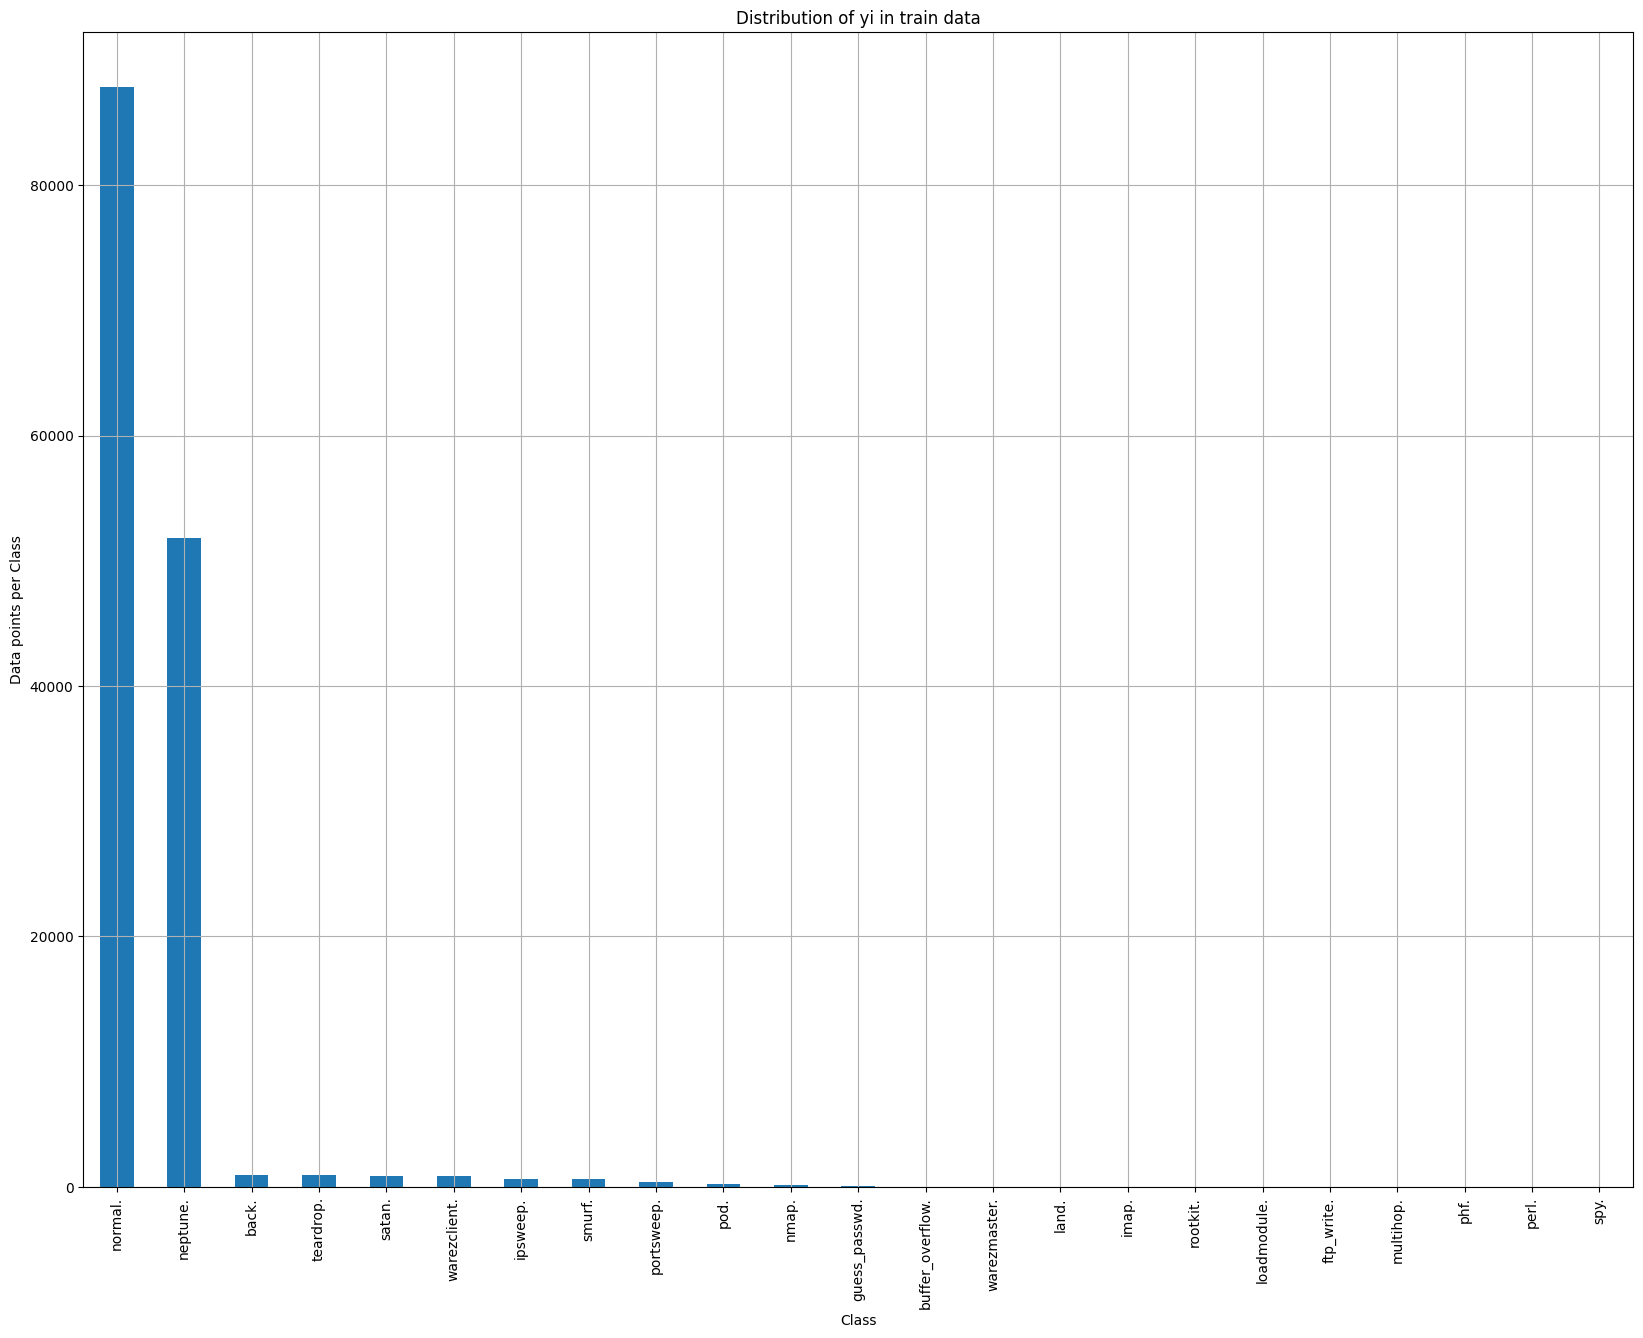

Number of data points in class 1 : 87832 ( 60.33 %)
Number of data points in class 2 : 51820 ( 35.594 %)
Number of data points in class 3 : 968 ( 0.665 %)
Number of data points in class 4 : 918 ( 0.631 %)
Number of data points in class 5 : 906 ( 0.622 %)
Number of data points in class 6 : 893 ( 0.613 %)
Number of data points in class 7 : 651 ( 0.447 %)
Number of data points in class 8 : 641 ( 0.44 %)
Number of data points in class 9 : 416 ( 0.286 %)
Number of data points in class 10 : 206 ( 0.141 %)
Number of data points in class 11 : 158 ( 0.109 %)
Number of data points in class 12 : 53 ( 0.036 %)
Number of data points in class 13 : 30 ( 0.021 %)
Number of data points in class 14 : 20 ( 0.014 %)
Number of data points in class 15 : 19 ( 0.013 %)
Number of data points in class 16 : 12 ( 0.008 %)
Number of data points in class 17 : 10 ( 0.007 %)
Number of data points in class 18 : 9 ( 0.006 %)
Number of data points in class 19 : 8 ( 0.005 %)
Number of data points in class 20 : 7 ( 0.005 

In [ ]:
plt.figure(figsize=(20,15))
class_distribution = data['intrusion_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/data.shape[0]*100), 3), '%)')



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'normal.'),
  Text(1, 0, 'buffer_overflow.'),
  Text(2, 0, 'loadmodule.'),
  Text(3, 0, 'perl.'),
  Text(4, 0, 'neptune.'),
  Text(5, 0, 'smurf.'),
  Text(6, 0, 'guess_passwd.'),
  Text(7, 0, 'pod.'),
  Text(8, 0, 'teardrop.'),
  Text(9, 0, 'portsweep.'),
  Text(10, 0, 'ipsweep.'),
  Text(11, 0, 'land.'),
  Text(12, 0, 'ftp_write.'),
  Text(13, 0, 'back.'),
  Text(14, 0, 'imap.'),
  Text(15, 0, 'satan.'),
  Text(16, 0, 'phf.'),
  Text(17, 0, 'nmap.'),
  Text(18, 0, 'multihop.'),
  Text(19, 0, 'warezmaster.'),
  Text(20, 0, 'warezclient.'),
  Text(21, 0, 'spy.'),
  Text(22, 0, 'rootkit.')])

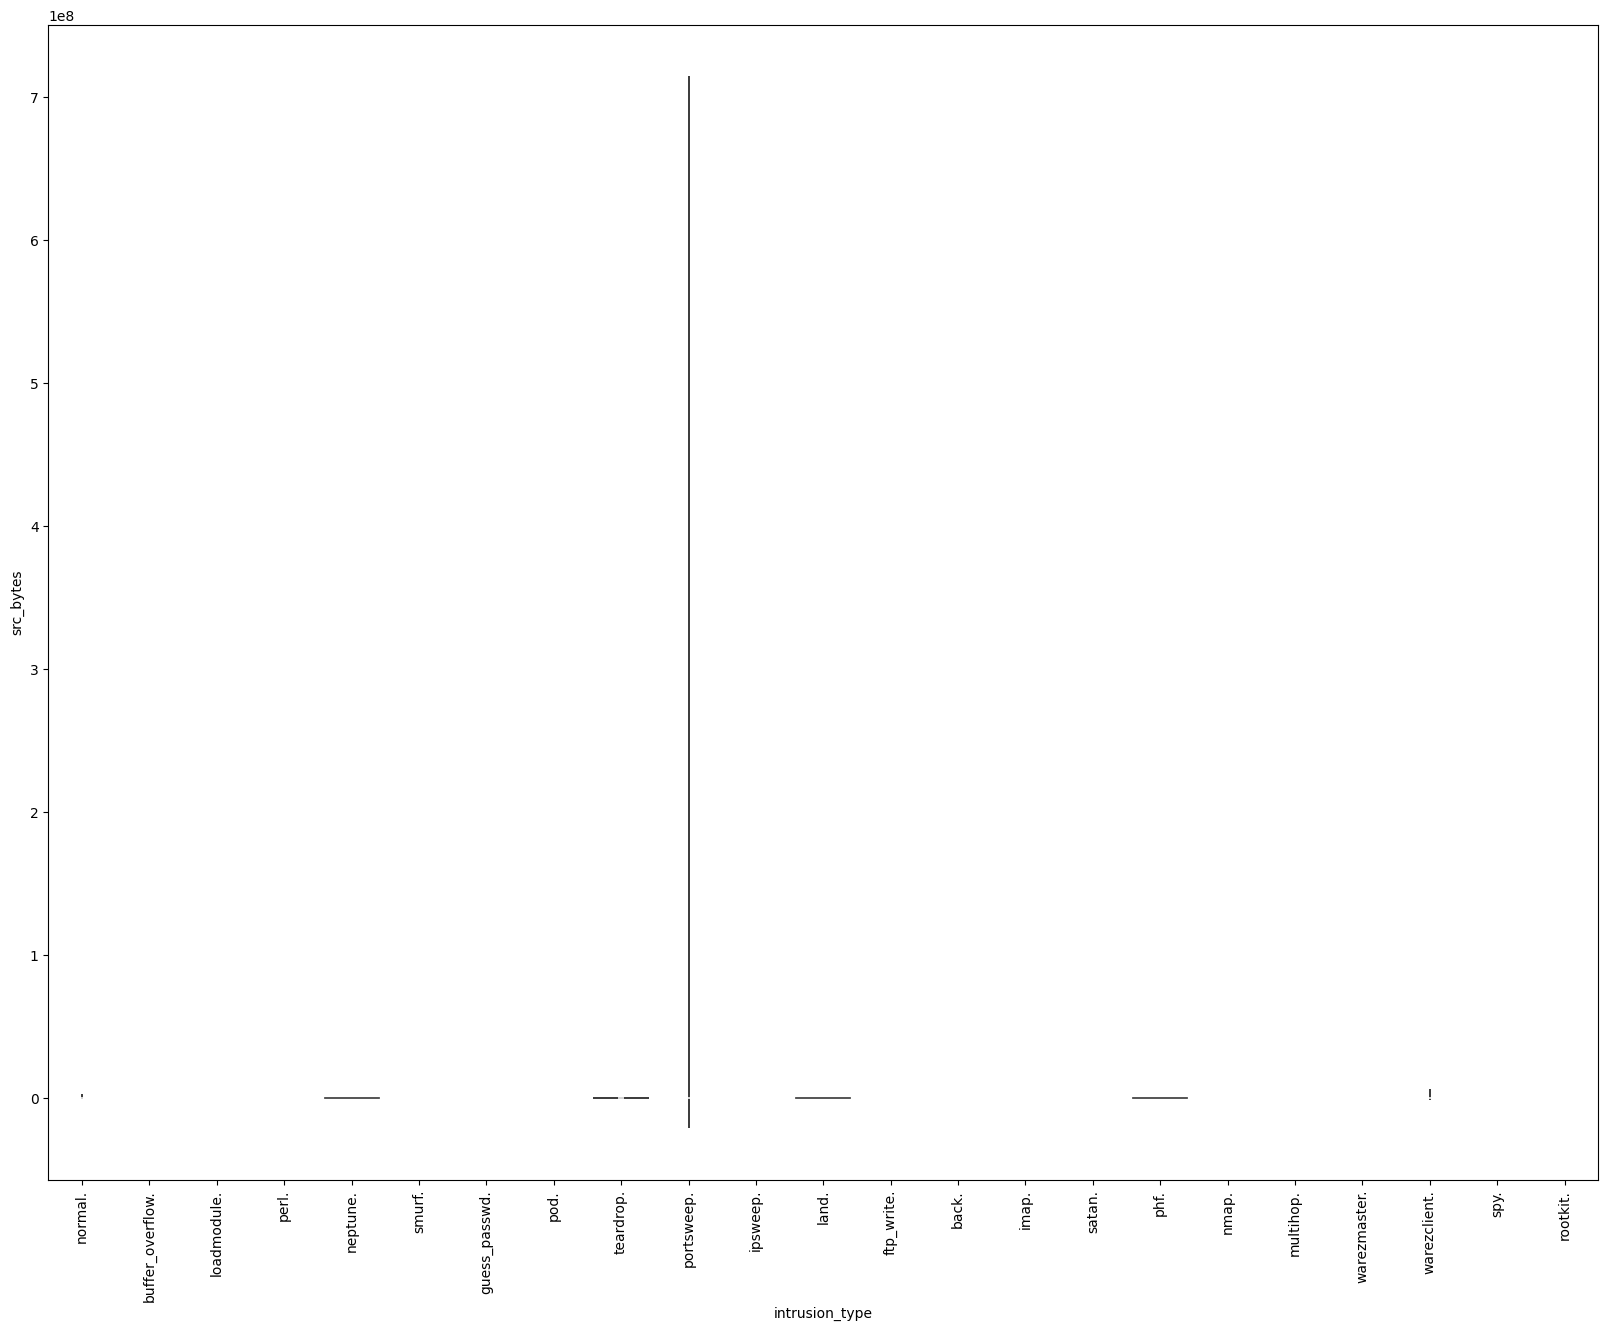

In [ ]:
plt.figure(figsize=(20,15))
sns.violinplot(x="intrusion_type", y="src_bytes", data=data)
plt.xticks(rotation=90)

Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('intrusion_type', axis=1), data['intrusion_type'], stratify=data['intrusion_type'], test_size=0.25)

In [ ]:
print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)

Train data
(109189, 41)
(109189,)
Test data
(36397, 41)
(36397,)


In [ ]:
#Protocol_type:-
protocol = list(X_train['protocol_type'].values)
protocol = list(set(protocol))
print('Protocol types are:', protocol)

from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocol_type'].values)
test_protocol = one_hot.transform(X_test['protocol_type'].values)
print(train_protocol[1].toarray())
train_protocol.shape

#Service:-
service = list(X_train['service'].values)
service = list(set(service))
print('Service types are:\n', service)

from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=service, binary=True)
train_service = one_hot.fit_transform(X_train['service'].values)
test_service = one_hot.transform(X_test['service'].values)
print(train_service[100].toarray())

train_service.shape

#Flag:-
flag = list(X_train['flag'].values)
flag = list(set(flag))
print('flag types are:', flag)

from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(binary=True)
one_hot.fit(X_train['flag'].values)
train_flag = one_hot.transform(X_train['flag'].values)
test_flag = one_hot.transform(X_test['flag'].values)
print(test_flag[3000].toarray())
train_flag.shape

X_train.drop(['protocol_type','service','flag'], axis=1, inplace=True)
X_test.drop(['protocol_type','service','flag'], axis=1, inplace=True)

Protocol types are: ['udp', 'tcp', 'icmp']
[[1 0 0]]
Service types are:
 ['login', 'netbios_ns', 'iso_tsap', 'red_i', 'netstat', 'daytime', 'rje', 'systat', 'csnet_ns', 'urh_i', 'uucp_path', 'eco_i', 'ftp', 'whois', 'ftp_data', 'netbios_dgm', 'mtp', 'printer', 'smtp', 'tim_i', 'courier', 'http', 'discard', 'gopher', 'domain_u', 'efs', 'Z39_50', 'IRC', 'urp_i', 'telnet', 'other', 'ntp_u', 'time', 'private', 'remote_job', 'sql_net', 'finger', 'exec', 'imap4', 'netbios_ssn', 'domain', 'ecr_i', 'uucp', 'hostnames', 'supdup', 'nnsp', 'ctf', 'ldap', 'X11', 'vmnet', 'pop_3', 'http_443', 'ssh', 'shell', 'link', 'pm_dump', 'pop_2', 'bgp', 'name', 'kshell', 'klogin', 'echo', 'sunrpc', 'auth', 'nntp']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
flag types are: ['S3', 'RSTO', 'S0', 'RSTOS0', 'REJ', 'SH', 'S2', 'SF', 'OTH', 'S1', 'RSTR']
[[0 0 0 0 0 0 0 0 0 1 0]]


Standardisation

In [ ]:
def feature_scaling(X_train, X_test, feature_name):

    '''
    This function performs standardisation on the features
    '''

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler1 = scaler.fit_transform(X_train[feature_name].values.reshape(-1,1))
    scaler2 = scaler.transform(X_test[feature_name].values.reshape(-1,1))

    return scaler1, scaler2

In [ ]:
#duration
duration1, duration2 = feature_scaling(X_train, X_test, 'duration')
print(duration1[1])

[-0.10868762]


In [ ]:
#src_bytes
src_bytes1, src_bytes2 = feature_scaling(X_train, X_test, 'src_bytes')
print(src_bytes1[1])

[-0.00460141]


In [ ]:
#wrong fragments
wrong_fragment1, wrong_fragment2 = feature_scaling(X_train, X_test, 'wrong_fragment')
print(wrong_fragment1[1])

[12.4543441]


In [ ]:
#dst_bytes:-
dst_bytes1, dst_bytes2 = feature_scaling(X_train, X_test, 'dst_bytes')
print(dst_bytes1[1])
#urgent :-
urgent1, urgent2 = feature_scaling(X_train, X_test, 'urgent')
print(urgent1[1])
#hot :-
hot1, hot2 = feature_scaling(X_train, X_test, 'hot')
print(hot1[1])

#num_failed_logins
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')
print(num_failed_logins1[1])

#num_compromised :-
num_compromised1, num_compromised2 = feature_scaling(X_train, X_test, 'num_compromised')
num_compromised1[1]

#root_shell :-
root_shell1, root_shell2 = feature_scaling(X_train, X_test, 'root_shell')
root_shell1[1]

#su_attempted :-
su_attempted1, su_attempted2 = feature_scaling(X_train, X_test, 'su_attempted')
su_attempted1[1]

#num_root:-
num_root1, num_root2 = feature_scaling(X_train, X_test, 'num_root')
num_root1[1]

#num_file_creations:-
num_file_creations1, num_file_creations2 = feature_scaling(X_train, X_test, 'num_file_creations')
num_file_creations1[1]

#num_shells:-
num_shells1, num_shells2 = feature_scaling(X_train, X_test, 'num_shells')
num_shells1[1]

#num_access_files:-
num_access_files1, num_access_files2 = feature_scaling(X_train, X_test, 'num_access_files')
num_access_files1[1]

#num_outbound_cmds:-
data['num_outbound_cmds'].value_counts()

#srv_count:-
srv_count1, srv_count2 = feature_scaling(X_train, X_test, 'srv_count')
srv_count1[1]

#serror_rate:-
serror_rate1, serror_rate2 = feature_scaling(X_train, X_test, 'serror_rate')
serror_rate1[1]

#srv_serror_rate:-
srv_serror_rate1, srv_serror_rate2 = feature_scaling(X_train, X_test, 'srv_serror_rate')
srv_serror_rate1[1]

#rerror_rate:-
rerror_rate1, rerror_rate2 = feature_scaling(X_train, X_test, 'rerror_rate')
rerror_rate1[1]

#srv_rerror_rate :-
srv_rerror_rate1, srv_rerror_rate2 = feature_scaling(X_train, X_test, 'srv_rerror_rate')
srv_rerror_rate1[1]
#same_srv_rate:-
same_srv_rate1, same_srv_rate2 = feature_scaling(X_train, X_test, 'same_srv_rate')
same_srv_rate1[1]

#diff_srv_rate:-
diff_srv_rate1, diff_srv_rate2 = feature_scaling(X_train, X_test, 'diff_srv_rate')
diff_srv_rate1[1]

#srv_diff_host_rate:-
srv_diff_host_rate1, srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'srv_diff_host_rate')
srv_diff_host_rate1[1]

#dst_host_count:-
dst_host_count1, dst_host_count2 = feature_scaling(X_train, X_test, 'dst_host_count')
dst_host_count1[1]

#dst_host_srv_count:-
dst_host_srv_count1, dst_host_srv_count2 = feature_scaling(X_train, X_test, 'dst_host_srv_count')
dst_host_srv_count1[1]

#dst_host_same_srv_rate:-
dst_host_same_srv_rate1, dst_host_same_srv_rate2= feature_scaling(X_train, X_test, 'dst_host_same_srv_rate')
dst_host_same_srv_rate1[1]

#dst_host_diff_srv_rate:-
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')
dst_host_diff_srv_rate1[1]

#dst_host_same_src_port_rate:-
dst_host_same_src_port_rate1, dst_host_same_src_port_rate2 = feature_scaling(X_train, X_test, 'dst_host_same_src_port_rate')
dst_host_same_src_port_rate1[1]

#dst_host_srv_diff_host_rate:-
dst_host_srv_diff_host_rate1, dst_host_srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_diff_host_rate')
dst_host_srv_diff_host_rate1[1]

#dst_host_serror_rate:-
dst_host_serror_rate1, dst_host_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_serror_rate')
dst_host_serror_rate1[1]

#dst_host_srv_serror_rate:-
dst_host_srv_serror_rate1, dst_host_srv_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_serror_rate')
dst_host_srv_serror_rate1[1]

#dst_host_rerror_rate:-
dst_host_rerror_rate1, dst_host_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_rerror_rate')
dst_host_rerror_rate1[1]

#dst_host_srv_rerror_rate:-
dst_host_srv_rerror_rate1, dst_host_srv_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_rerror_rate')
dst_host_srv_rerror_rate1[1]

#num_failed_logins :-
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')
num_failed_logins1[1]

#land:-
land1, land2 = np.array([X_train['land'].values]), np.array([X_test['land'].values])
land1.shape

#is_host_login :-
is_host_login1, is_host_login2 = np.array([X_train['is_host_login'].values]), np.array([X_test['is_host_login'].values])
is_host_login1.shape

#is_guest_login :-
is_guest_login1, is_guest_login2 = np.array([X_train['is_guest_login'].values]), np.array([X_test['is_guest_login'].values])
is_guest_login1.shape

#logged_in :-
logged_in1, logged_in2 = np.array([X_train['logged_in'].values]), np.array([X_test['logged_in'].values])
logged_in1.shape

#count:-
count1, count2 = feature_scaling(X_train, X_test, 'count')
count1[1]

#dst_host_diff_srv_rate:-
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')
dst_host_diff_srv_rate1[1]

[-0.04626239]
[-0.00419675]
[-0.07063975]
[-0.01822726]


array([4.88983928])

Merging categorical and continuous features

In [ ]:
from scipy.sparse import hstack

In [ ]:
X_train_1 = hstack((duration1, train_protocol, train_service, train_flag, src_bytes1,
       dst_bytes1, land1.T, wrong_fragment1, urgent1, hot1,
       num_failed_logins1, logged_in1.T, num_compromised1, root_shell1,
       su_attempted1, num_root1, num_file_creations1, num_shells1,
       num_access_files1, is_host_login1.T,
       is_guest_login1.T, count1, srv_count1, serror_rate1,
       srv_serror_rate1, rerror_rate1, srv_rerror_rate1, same_srv_rate1,
       diff_srv_rate1, srv_diff_host_rate1, dst_host_count1,
       dst_host_srv_count1, dst_host_same_srv_rate1,
       dst_host_diff_srv_rate1, dst_host_same_src_port_rate1,
       dst_host_srv_diff_host_rate1, dst_host_serror_rate1,
       dst_host_srv_serror_rate1, dst_host_rerror_rate1,
       dst_host_srv_rerror_rate1))

In [ ]:
X_train_1.shape

(109189, 116)

In [ ]:
X_test_1 = hstack((duration2, test_protocol, test_service, test_flag, src_bytes2,
       dst_bytes2, land2.T, wrong_fragment2, urgent2, hot2,
       num_failed_logins2, logged_in2.T, num_compromised2, root_shell2,
       su_attempted2, num_root2, num_file_creations2, num_shells2,
       num_access_files2, is_host_login2.T,
       is_guest_login2.T, count2, srv_count2, serror_rate2,
       srv_serror_rate2, rerror_rate2, srv_rerror_rate2, same_srv_rate2,
       diff_srv_rate2, srv_diff_host_rate2, dst_host_count2,
       dst_host_srv_count2, dst_host_same_srv_rate2,
       dst_host_diff_srv_rate2, dst_host_same_src_port_rate2,
       dst_host_srv_diff_host_rate2, dst_host_serror_rate2,
       dst_host_srv_serror_rate2, dst_host_rerror_rate2,
       dst_host_srv_rerror_rate2))


In [ ]:
X_test_1.shape

(36397, 116)

In [ ]:
import joblib
joblib.dump(X_train_1,'X_train_1.pkl')
joblib.dump(X_test_1,'X_test_1.pkl')
X_train_1 = joblib.load('X_train_1.pkl')
X_test_1 = joblib.load('X_test_1.pkl')
joblib.dump(Y_train,'Y_train.pkl')
joblib.dump(Y_test,'Y_test.pkl')
Y_train = joblib.load('Y_train.pkl')
Y_test = joblib.load('Y_test.pkl')

MACHINE ALGORITHM
*Naive Bayes
*Logistic Regression
*SVM
*Decision Tree
*Random Forest

In [ ]:
def confusion_matrix_func(Y_test, y_test_pred):
    '''
    This function plots the confusion matrix heatmap using the actual and predicted values.
    '''
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit',
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

In [ ]:
def model(model_name, X_train, Y_train, X_test, Y_test):

    '''
    This function computes the performance scores on the train and test data.
    '''

    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)

    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')

    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)

    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model

    return results_tr, results_test

In [ ]:
def print_grid_search_attributes(model):

    '''
    This function prints all the grid search attributes
    '''

    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [ ]:
def tpr_fpr_func(Y_tr, Y_pred):
    '''
    This function computes the TPR and FPR scores using the actual and predicetd values
    '''
    results = dict()
    Y_tr = Y_tr.to_list()
    tp = 0; fp = 0; positives = 0; negatives = 0; length = len(Y_tr)
    for i in range(len(Y_tr)):
        if Y_tr[i]=='normal.':
            positives += 1
        else:
            negatives += 1

    for i in range(len(Y_pred)):
        if Y_tr[i]=='normal.' and Y_pred[i]=='normal.':
            tp += 1
        elif Y_tr[i]!='normal.' and Y_pred[i]=='normal.':
            fp += 1

    tpr = tp/positives
    fpr = fp/negatives

    results['tp'] = tp; results['tpr'] = tpr; results['fp'] = fp; results['fpr'] = fpr

    return results

Gaussian Naive Bayes

In [ ]:
hyperparameter = {'var_smoothing':[10**x for x in range(-9,3)]}

from sklearn.naive_bayes import GaussianNB
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

nb = GaussianNB()
nb_grid = GridSearchCV(nb, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Completed
Time taken: 0:00:51.422757
Prediction on test data:
Completed
Time taken: 0:00:00.762516
Performance metrics:
Confusion Matrix is:


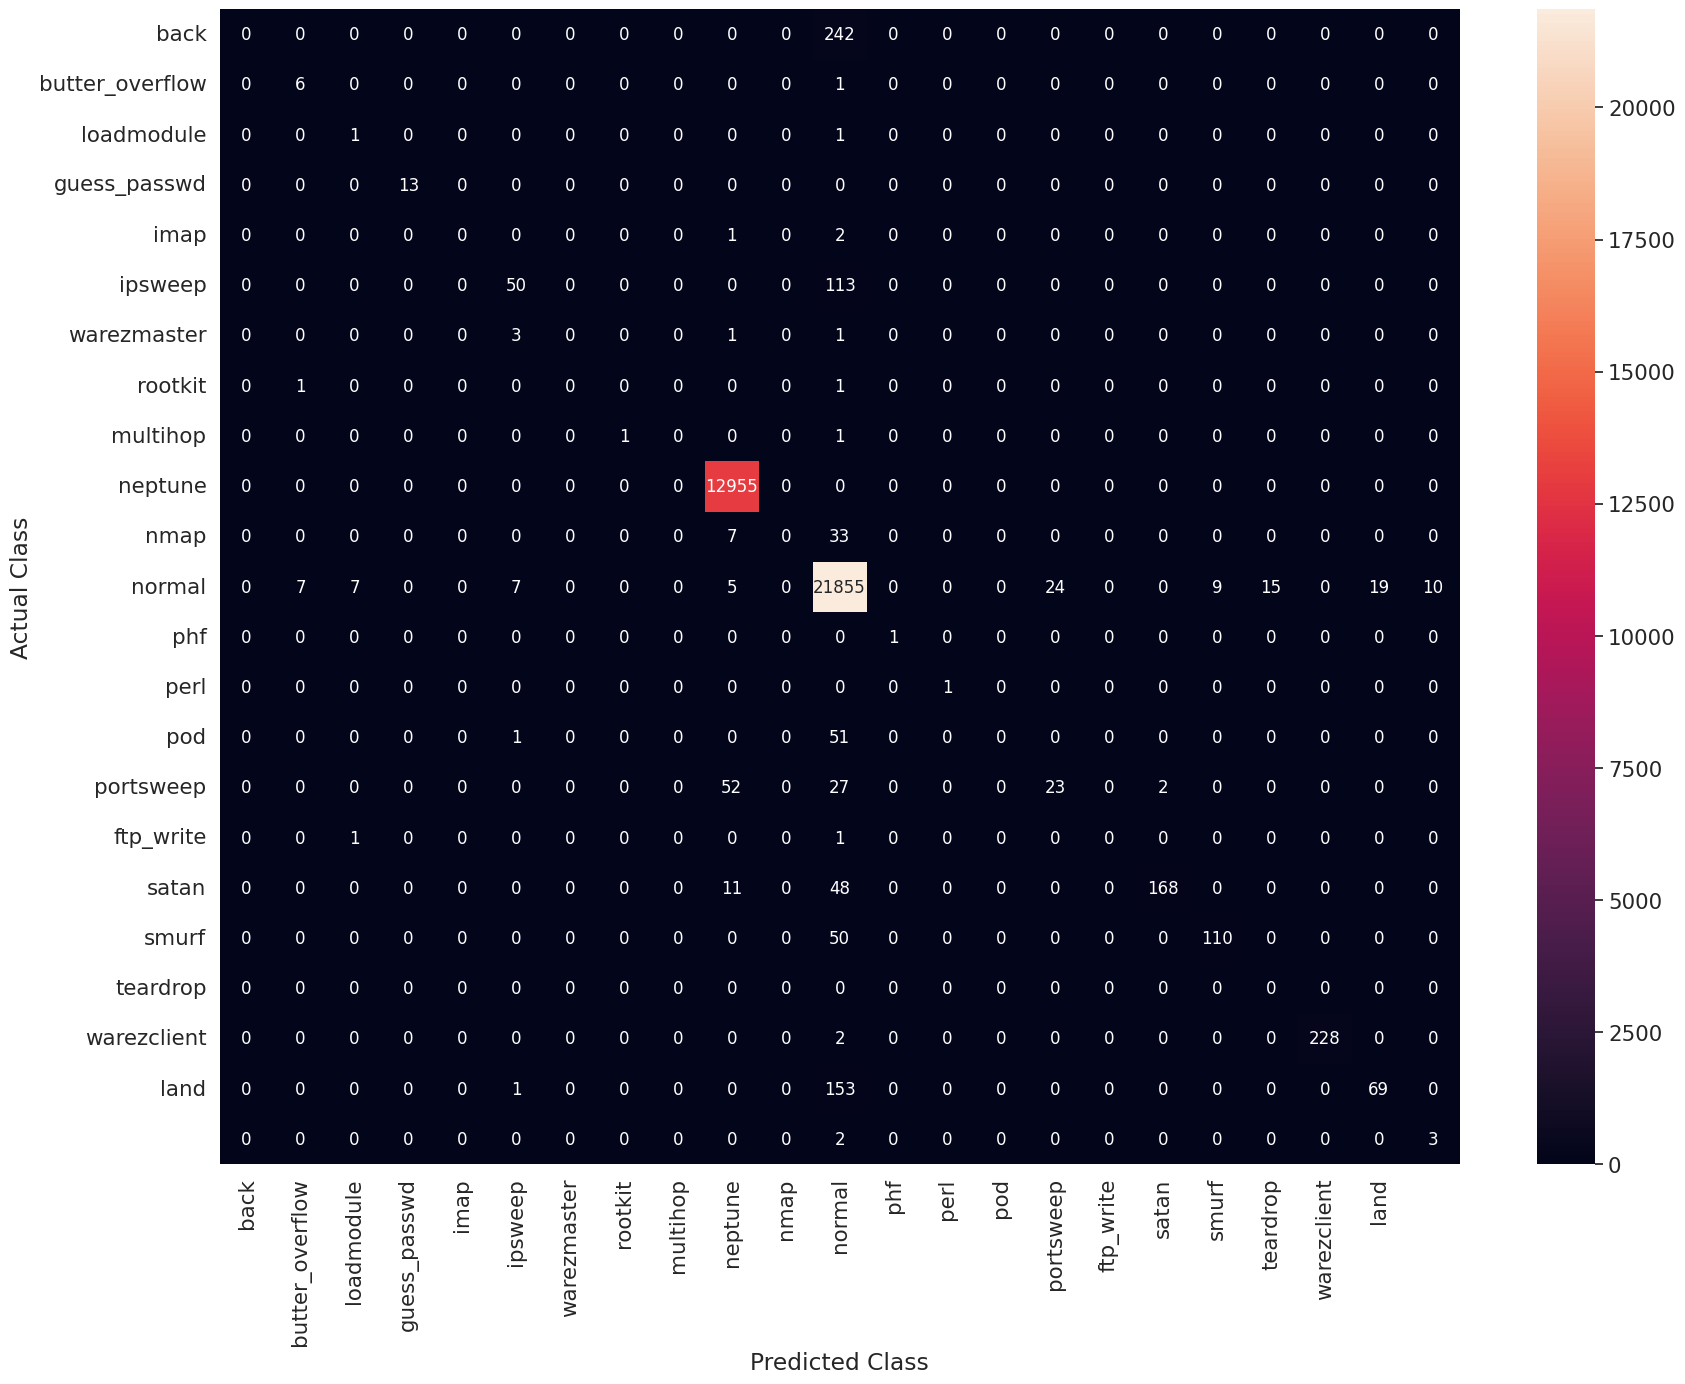

Precision score is:
0.9645427936413824
Recall score is:
0.9748880402230953
F1-score is:
0.9680976633473075


In [ ]:
nb_grid_results_tr, nb_grid_results_test = model(nb_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(nb_grid)

---------------------------
|      Best Estimator     |
---------------------------

	GaussianNB(var_smoothing=10)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'var_smoothing': 10}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9727262002557534



In [ ]:

import joblib

joblib.dump(nb_grid.best_estimator_, 'nb_gs.pkl')

['nb_gs.pkl']

In [ ]:
nb_gs = nb_grid.best_estimator_
y_tr_pred = nb_gs.predict(X_train_1.toarray())
y_test_pred = nb_gs.predict(X_test_1.toarray())
tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
nb_grid_results_test

{'precision': 0.9645427936413824,
 'recall': 0.9748880402230953,
 'f1_score': 0.9680976633473075,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

Logistic Regression

In [ ]:
hyperparameter = {'alpha':[0.001, 0.01, 0.1, 1, 10, 20, 30], 'penalty':['l1', 'l2']}
from sklearn.linear_model import SGDClassifier
lr = SGDClassifier(loss='log_loss') # Changed loss parameter to 'log_loss'
lr_grid = GridSearchCV(lr, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Completed
Time taken: 0:18:41.593798
Prediction on test data:
Completed
Time taken: 0:00:00.043286
Performance metrics:
Confusion Matrix is:


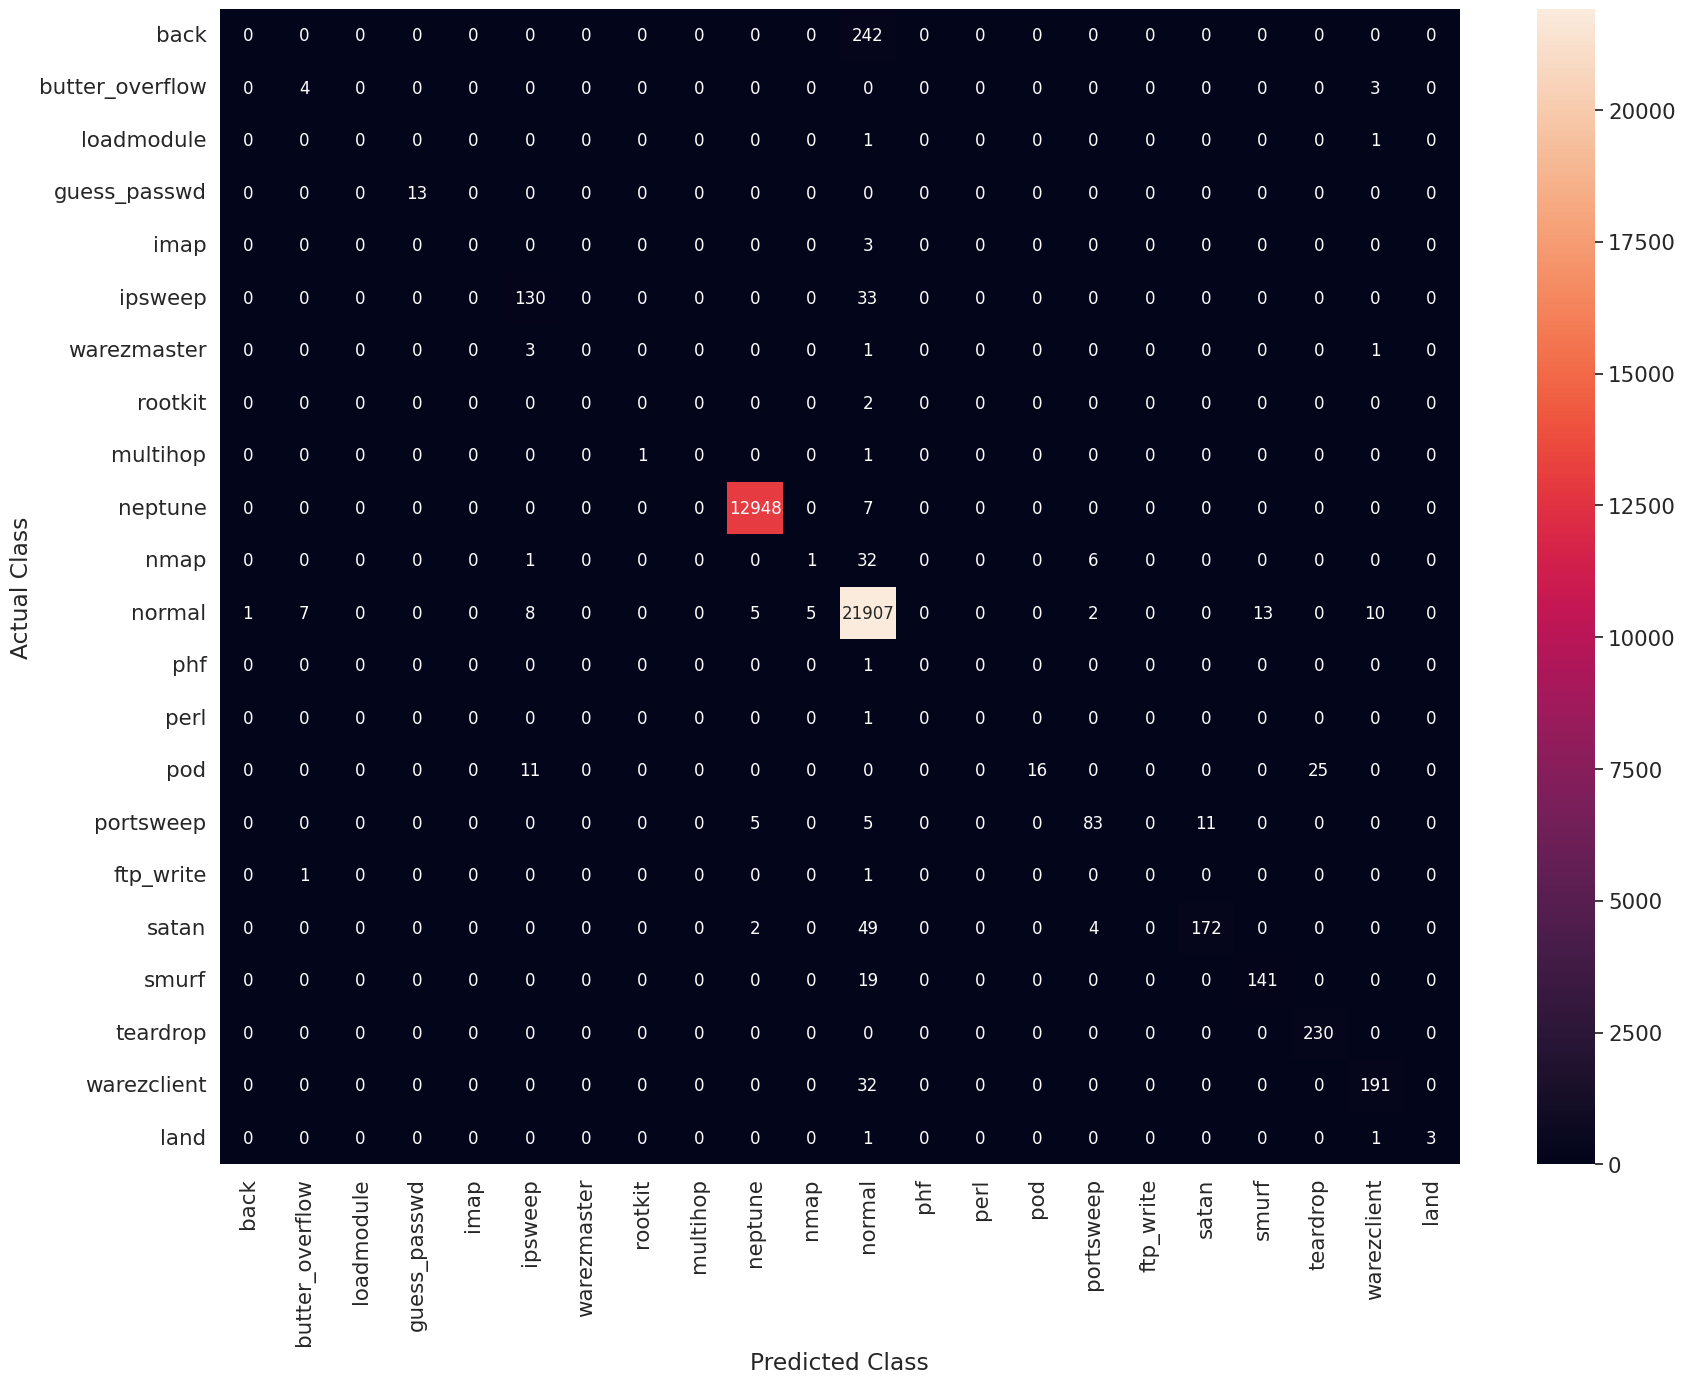

Precision score is:
0.9769695135179824
Recall score is:
0.984669066131824
F1-score is:
0.9803486050758133


In [ ]:
lr_grid_results_tr, lr_grid_results_test = model(lr_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(lr_grid)

---------------------------
|      Best Estimator     |
---------------------------

	SGDClassifier(alpha=0.001, loss='log_loss', penalty='l1')

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'alpha': 0.001, 'penalty': 'l1'}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9844947745223529



In [ ]:
joblib.dump(lr_grid.best_estimator_, 'lr_gs.pkl')

['lr_gs.pkl']

In [ ]:
lr_gs = lr_grid.best_estimator_
y_tr_pred = lr_gs.predict(X_train_1.toarray())
y_test_pred = lr_gs.predict(X_test_1.toarray())
tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
lr_grid_results_test

{'precision': 0.9769695135179824,
 'recall': 0.984669066131824,
 'f1_score': 0.9803486050758133,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [ ]:
tpr_fpr_test

{'tp': 21907, 'tpr': 0.9976773840969123, 'fp': 431, 'fpr': 0.02984971258397396}

SVM

In [ ]:
hyperparameter = {'alpha':[10**x for x in range(-8,3)], 'penalty':['l1', 'l2']}

from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge')
svm_grid = GridSearchCV(svm, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 22 candidates, totalling 110 fits
Completed
Time taken: 0:33:46.846875
Prediction on test data:
Completed
Time taken: 0:00:00.054057
Performance metrics:
Confusion Matrix is:


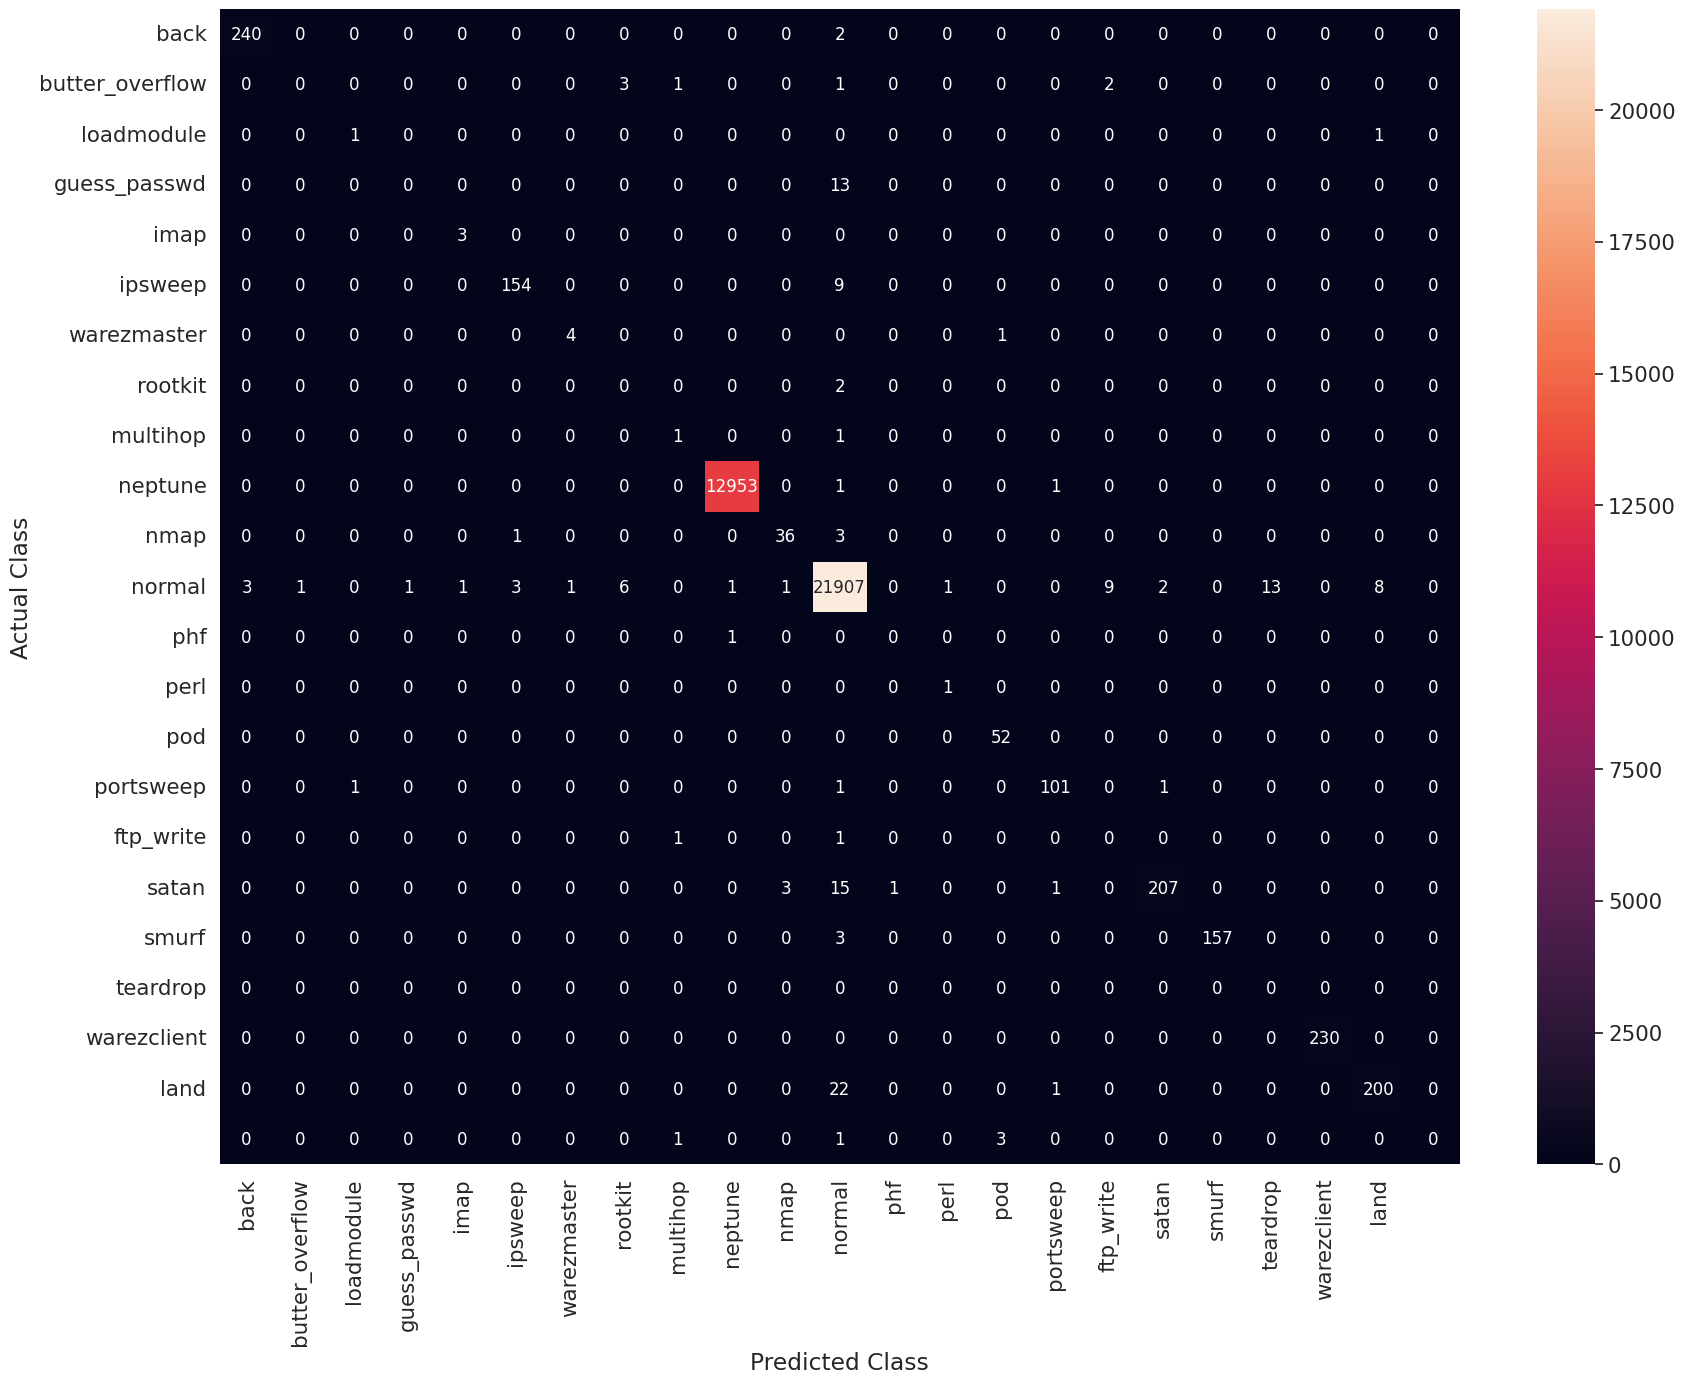

Precision score is:
0.9960891731436321
Recall score is:
0.9958787812182323
F1-score is:
0.995959476675242


In [ ]:
svm_grid_results_tr, svm_grid_results_test = model(svm_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
joblib.dump(svm_grid.best_estimator_, 'svm_gs.pkl')

['svm_gs.pkl']

In [ ]:
svm_gs = svm_grid.best_estimator_
y_tr_pred = svm_gs.predict(X_train_1.toarray())
y_test_pred = svm_gs.predict(X_test_1.toarray())
svm_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
svm_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
svm_grid_results_test

{'precision': 0.9960891731436321,
 'recall': 0.9958787812182323,
 'f1_score': 0.995959476675242,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [ ]:
svm_tpr_fpr_test

{'tp': 21907, 'tpr': 0.9976773840969123, 'fp': 75, 'fpr': 0.005194265530853937}

Decision Tree

In [ ]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Completed
Time taken: 0:01:58.812126
Prediction on test data:
Completed
Time taken: 0:00:00.012606
Performance metrics:
Confusion Matrix is:


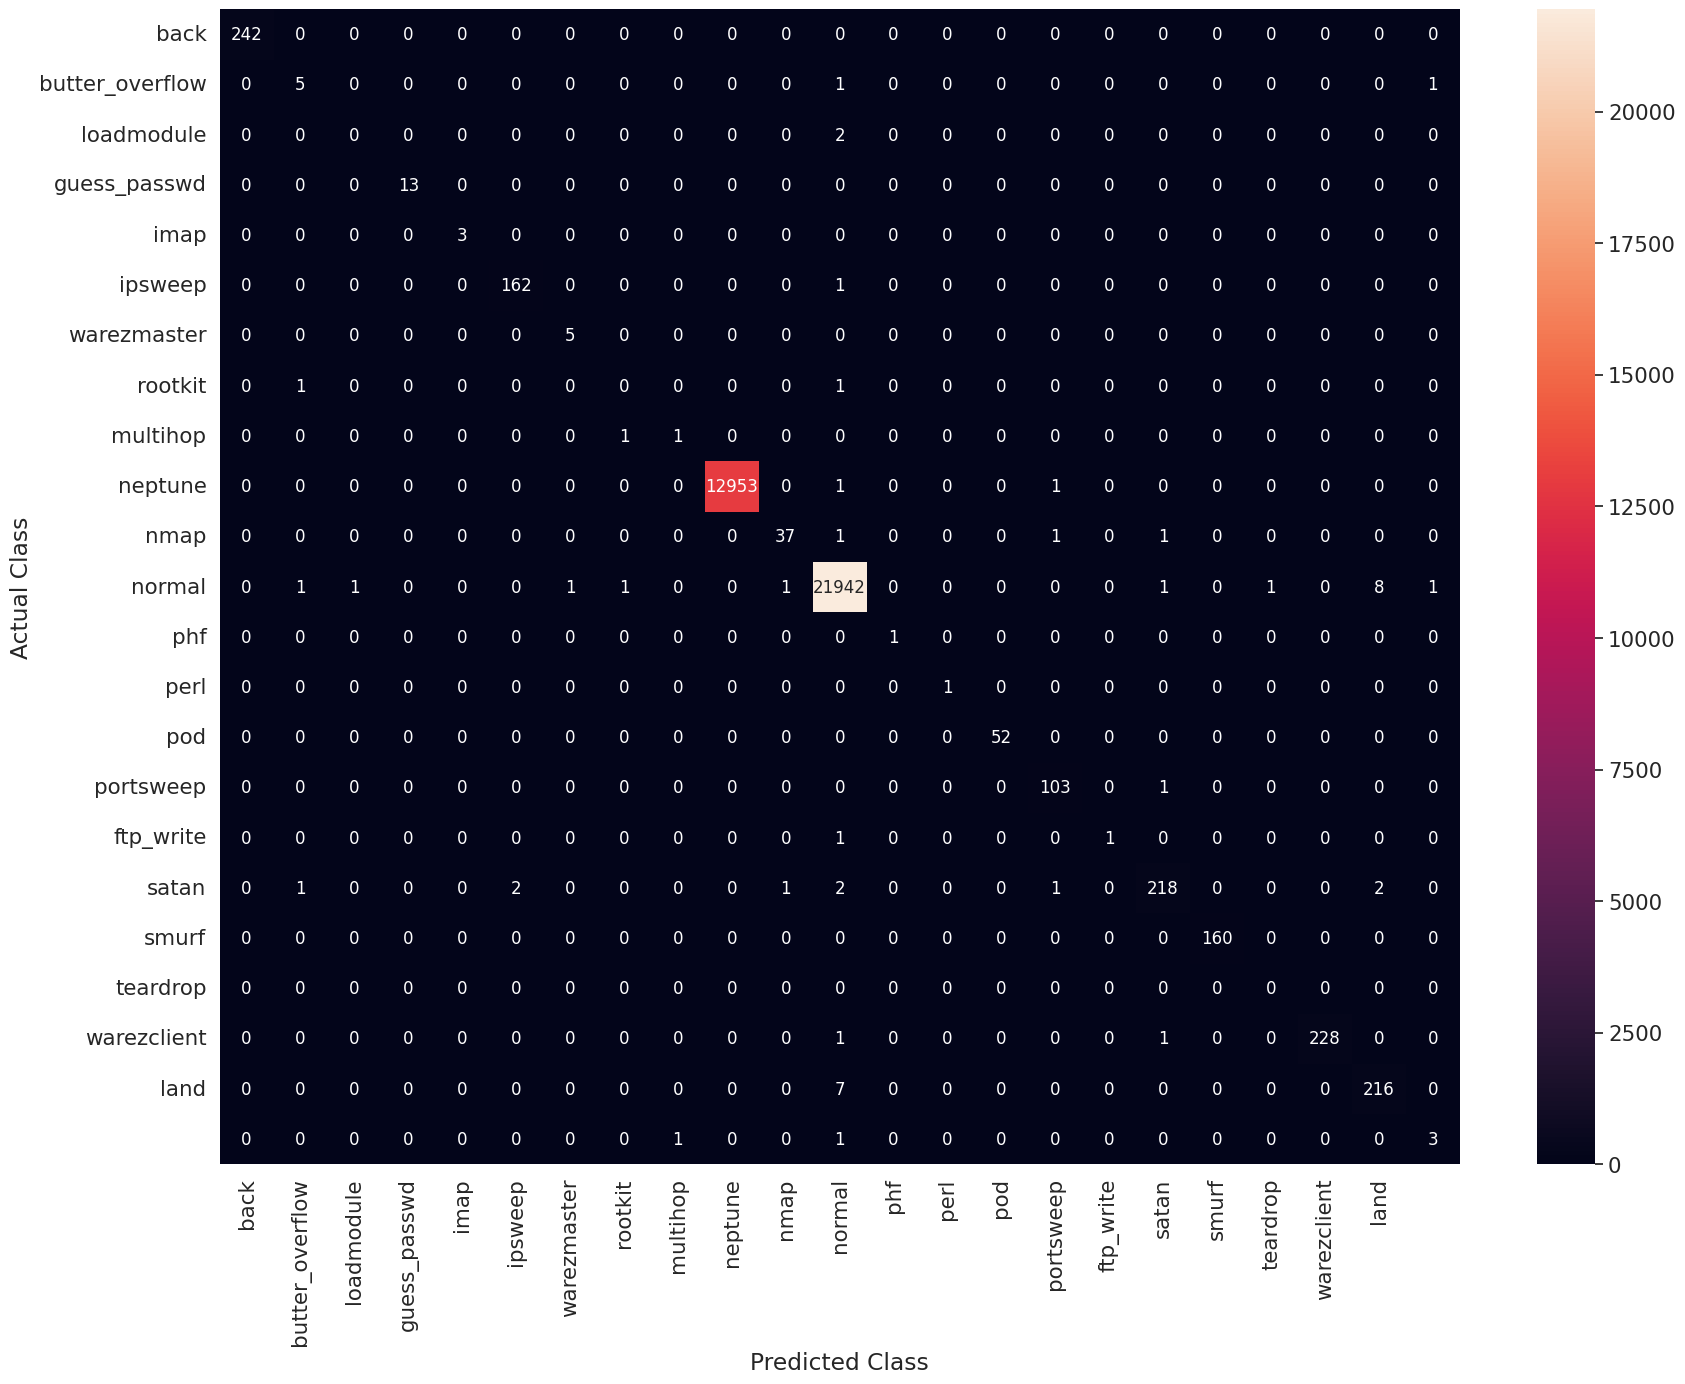

Precision score is:
0.9986153922656781
Recall score is:
0.998598785614199
F1-score is:
0.9985992967806235


In [ ]:
decision_tree_grid_results_tr, decision_tree_grid_results_test = model(decision_tree_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(decision_tree_grid)

---------------------------
|      Best Estimator     |
---------------------------

	DecisionTreeClassifier(class_weight='balanced', max_depth=50,
                       min_samples_split=5)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 50, 'min_samples_split': 5}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9980034612158427



In [ ]:
joblib.dump(decision_tree_grid.best_estimator_, 'decision_tree_gs.pkl')

['decision_tree_gs.pkl']

In [ ]:
dt_gs = decision_tree_grid.best_estimator_
y_tr_pred = dt_gs.predict(X_train_1.toarray())
y_test_pred = dt_gs.predict(X_test_1.toarray())
dt_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
dt_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
decision_tree_grid_results_test

{'precision': 0.9986153922656781,
 'recall': 0.998598785614199,
 'f1_score': 0.9985992967806235,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [ ]:
dt_tpr_fpr_test

{'tp': 21942, 'tpr': 0.9992713361872666, 'fp': 19, 'fpr': 0.001315880601149664}

Random Forest

In [ ]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Completed
Time taken: 0:54:00.811956
Prediction on test data:
Completed
Time taken: 0:00:00.491985
Performance metrics:
Confusion Matrix is:


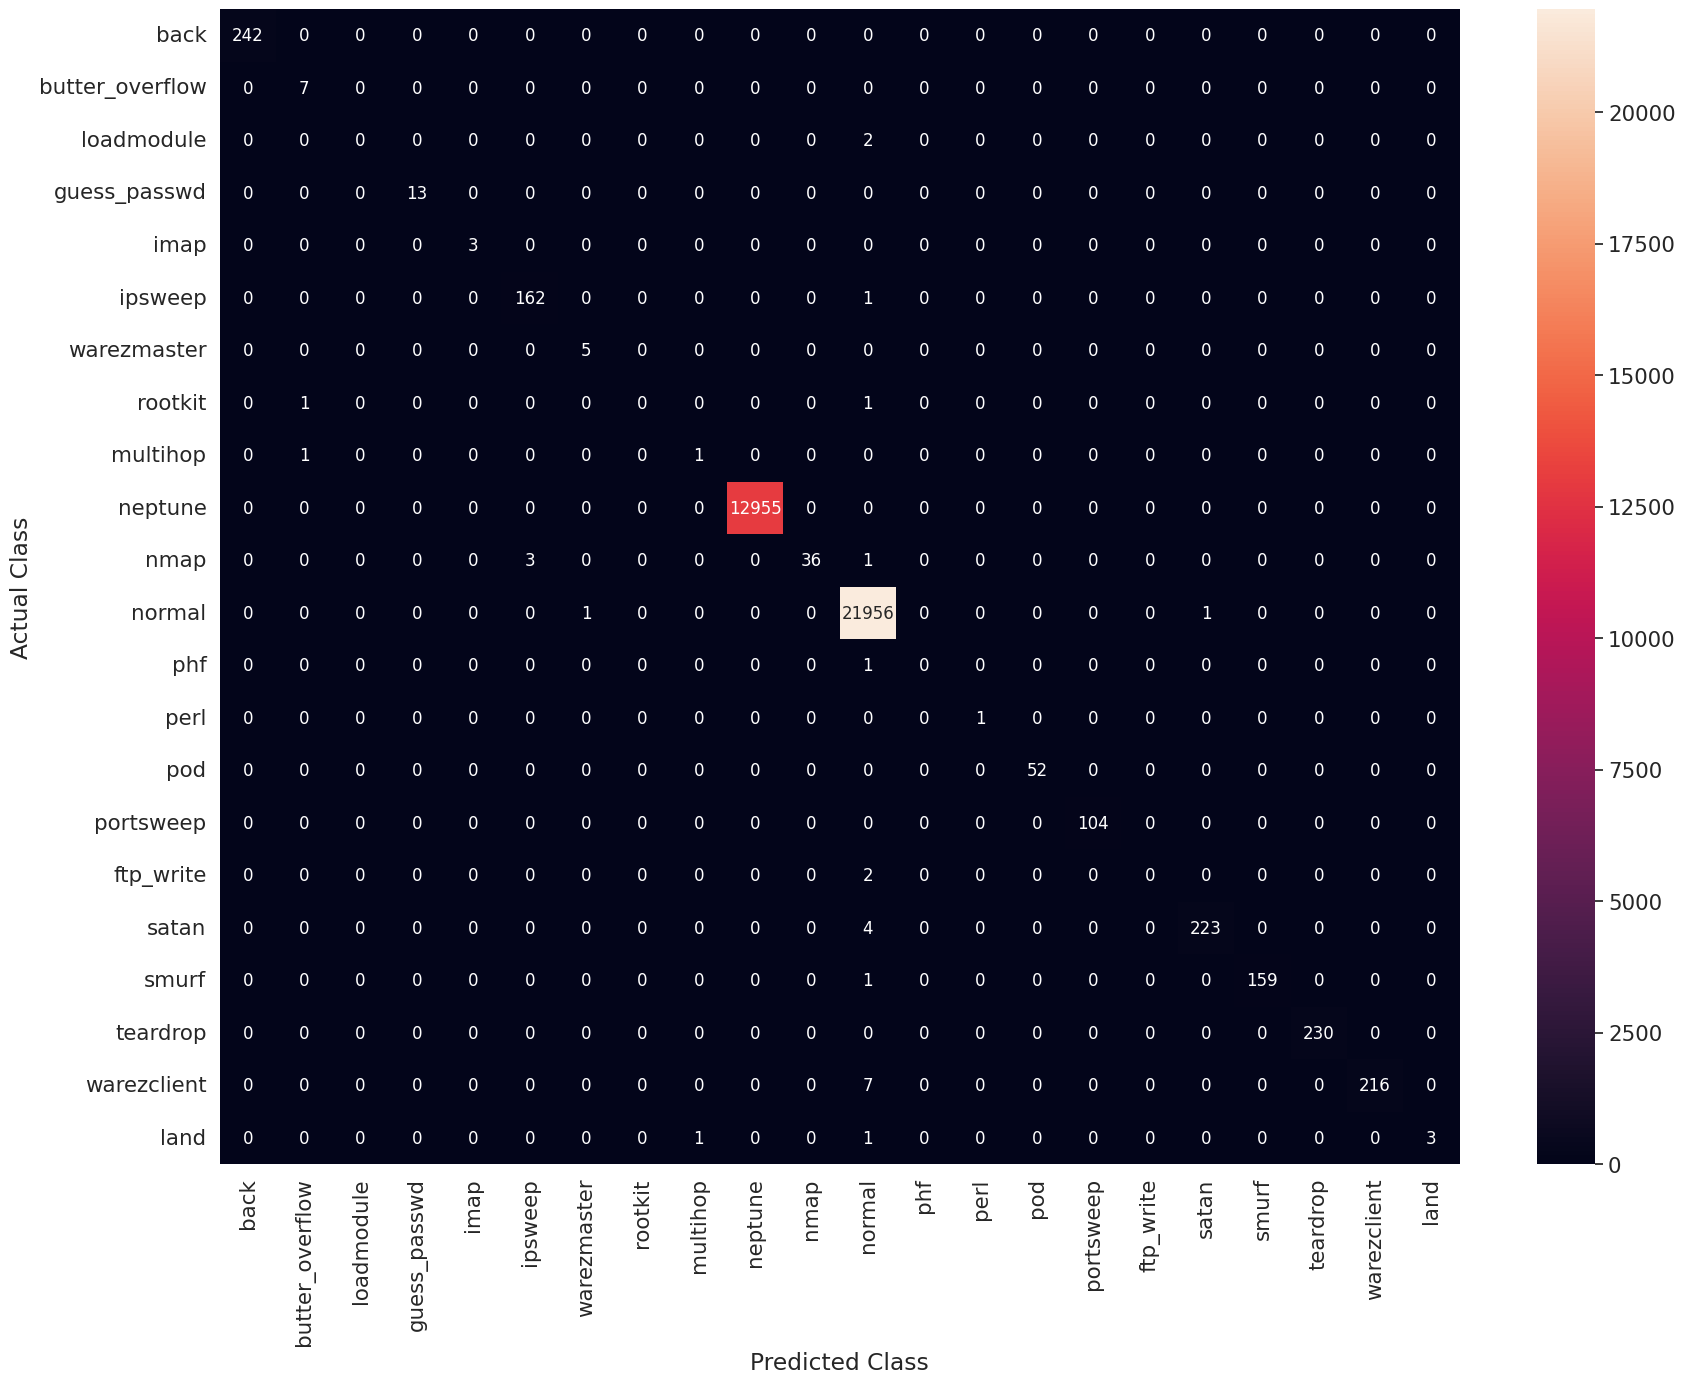

Precision score is:
0.9990288275746506
Recall score is:
0.9992032310355249
F1-score is:
0.9991004300903796


In [ ]:
rf_grid_results_tr, rf_grid_results_test = model(rf_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(rf_grid)

---------------------------
|      Best Estimator     |
---------------------------

	RandomForestClassifier(class_weight='balanced', max_depth=1000,
                       min_samples_split=10)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 1000, 'min_samples_split': 10, 'n_estimators': 100}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9990566804433065



In [ ]:
rf_gs = rf_grid.best_estimator_
y_tr_pred = rf_gs.predict(X_train_1.toarray())
y_test_pred = rf_gs.predict(X_test_1.toarray())
rf_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
rf_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
joblib.dump(rf_grid.best_estimator_, 'rf_gs.pkl')

['rf_gs.pkl']

In [ ]:
rf_grid_results_test

{'precision': 0.9990288275746506,
 'recall': 0.9992032310355249,
 'f1_score': 0.9991004300903796,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [ ]:
rf_tpr_fpr_test

{'tp': 21956,
 'tpr': 0.9999089170234083,
 'fp': 21,
 'fpr': 0.0014543943486391025}

In [ ]:
# prompt: what is the main objective of kdd dataset

The main objective of the KDD Cup 1999 dataset is to **detect intrusions or network attacks in computer networks**.

The dataset contains a large collection of network connection data, and the goal is to build machine learning models that can accurately identify different types of attacks from normal network traffic.

Specifically, the KDD Cup 1999 dataset is used for developing and evaluating intrusion detection systems (IDS). These systems are crucial for safeguarding computer networks against malicious activities such as denial-of-service attacks, probing, user-to-root attacks, and more.


In the provided code, you're working with this dataset by:

1. **Preprocessing the data:** You are performing feature scaling to normalize numerical features.
2. **Training various machine learning models:** The code explores different algorithms (Naive Bayes, Logistic Regression, SVM, Decision Tree, Random Forest) for intrusion detection.
3. **Evaluating the model performance:** The goal is to achieve high accuracy, precision, recall, and F1-score in identifying network attacks using the trained models.
4. **Analyzing the results:** The code also generates confusion matrices and computes TPR and FPR to evaluate model effectiveness and understand its performance characteristics.


Essentially, the KDD Cup 1999 dataset plays a vital role in research and development efforts focused on enhancing network security and building more robust intrusion detection systems.
